# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muchammad Wildan Alkautsar
- **Email:** muchammadwr@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/muchammadwr

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Jam berapa yang paling sering dan paling jarang disewa?
- **Pertanyaan 2:** Pada musim apa penyewaan sepeda mencapai puncaknya?
- **Pertanyaan 3:** Bagaimana kinerja penjualan perusahaan dalam beberapa tahun terakhir?
- **Pertanyaan 4:** Bagaimana perbandingan antara pelanggan terdaftar dan pelanggan kasual?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore") 

## Data Wrangling

### Gathering Data

In [3]:
# Memuat data Hari
df_day = pd.read_csv('./data/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Memuat data Jam
df_hour = pd.read_csv('./data/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

##### Data Hari

In [5]:
# Informasi data hari
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Cek Duplikat data hari
df_day.duplicated().sum()

0

In [7]:
# Cek Missing Value data hari
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Deskriptif statistik data hari
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Data Hour

In [9]:
# Informasi Data jam
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# Cek duplikat data jam
df_hour.duplicated().sum()

0

In [11]:
# Cek missing value data jam
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# Deskriptif statistikat data jam
df_hour.describe().round(2)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379.00,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,17379.00,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


### Cleaning Data

In [13]:
# Drop kolom yang tidak dugunakan
df_day.drop(['workingday'], axis=1, inplace=True)
df_hour.drop(['workingday'], axis=1, inplace=True)

In [14]:
# Mengubah type data int to categorical 
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
for column in columns:
    df_day[column] = df_day[column].astype('category')
    df_hour[column] = df_hour[column].astype('category')

In [15]:
# Mengubah type data object to datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [16]:
# Check Again
print(f'df_day["dteday"]: {df_day['dteday'].dtypes}')
print(f'df_hour["dteday"]: {df_hour['dteday'].dtypes}')

df_day["dteday"]: datetime64[ns]
df_hour["dteday"]: datetime64[ns]


In [17]:
# Mengganti nama kolom
df_day.rename(columns={
    'yr':'year',
    'mnth':'month',
    'weekday':'one_of_week',
    'weathersit':'weather_situation',
    'windspeed':'wind_speed',
    'cnt':'count_cr',
    'hum':'humidity'
},inplace=True)

In [18]:
df_hour.rename(columns={
    'yr':'year',
    'hr':'hours',
    'mnth':'month',
    'weekday':'one_of_week', 
    'weathersit':'weather_situation',
    'windspeed':'wind_speed',
    'cnt':'count_cr',
    'hum':'humidity'
},inplace=True)


In [19]:
# konversi season menjadi categorical
season_mapping = {
    1: 'Spring', 
    2: 'Summer', 
    3: 'Fall', 
    4: 'Winter'
}

df_day['season'] = df_day['season'].map(season_mapping)
df_hour['season'] = df_hour['season'].map(season_mapping)


In [20]:
# konversi month menjadi categorical
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df_day['month'] = df_day['month'].map(month_mapping)
df_hour['month'] = df_hour['month'].map(month_mapping)

In [21]:
# konversi weather_situation menjadi categorical 
weather_situation_mapping = {
    1:'Clear', 
    2:'Misty', 
    3:'Light_RainSnow', 
    4:'Heavy_RainSnow'
}
df_day['weather_situation'] = df_day['weather_situation'].map(weather_situation_mapping)
df_hour['weather_situation'] = df_hour['weather_situation'].map(weather_situation_mapping)

In [22]:
# konversi one_of_week menjadi categorical
one_of_week_mapping = {
    0: 'Sunday', 
    1: 'Monday', 
    2: 'Tuesday', 
    3: 'Wednesday', 
    4: 'Thursday', 
    5: 'Friday', 
    6: 'Saturday'
}

df_day['one_of_week'] = df_day['one_of_week'].map(one_of_week_mapping)
df_hour['one_of_week'] = df_hour['one_of_week'].map(one_of_week_mapping)

In [23]:
# konversi year 
year_mapping = {
    0: 2011,
    1: 2012
}
df_hour['year'] = df_hour['year'].map(year_mapping)
df_day['year'] = df_day['year'].map(year_mapping)

In [24]:
# Menghitung Humidity
df_day['humidity'] = df_day['humidity']*100
df_hour['humidity'] = df_hour['humidity']*100

Membuat kolom baru bernama days_category yang menunjukan isi kolom tersebut weekend atau weekdays


In [25]:
# Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays
one_of_week = [
    "Monday", 
    "Tuesday", 
    "Wednesday", 
    "Thursday", 
    "Friday", 
    "Saturday", 
    "Sunday"
]
def category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

df_hour["category_days"] = df_hour["one_of_week"].apply(category_days)
df_day["category_days"] = df_day["one_of_week"].apply(category_days)

In [26]:
def classify_humadity(humadity):
    if humadity < 45:
        return "Dry"
    elif humadity >= 45 and humadity < 65:
        return "Normal"
    else:
        return "Humid"
df_hour['humidity_category'] = df_hour['humidity'].apply(classify_humadity) 
df_day['humidity_category'] = df_day['humidity'].apply(classify_humadity)

In [27]:
# Check again
df_hour.head()

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,Clear,0.24,0.2879,81.0,0.0,3,13,16,weekend,Humid
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,Clear,0.22,0.2727,80.0,0.0,8,32,40,weekend,Humid
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,Clear,0.22,0.2727,80.0,0.0,5,27,32,weekend,Humid
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,Clear,0.24,0.2879,75.0,0.0,3,10,13,weekend,Humid
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,Clear,0.24,0.2879,75.0,0.0,0,1,1,weekend,Humid


In [28]:
df_day.head()

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985,weekend,Humid
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801,weekend,Humid
2,3,2011-01-03,Spring,2011,Jan,0,Monday,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349,weekdays,Dry
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,Clear,0.200000,0.212122,59.0435,0.160296,108,1454,1562,weekdays,Normal
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,Clear,0.226957,0.229270,43.6957,0.186900,82,1518,1600,weekdays,Dry


## Exploratory Data Analysis (EDA)

### Explore Data Jam

In [29]:
df_hour.describe(include='all').round(2)

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.00,17379,17379,17379.0,17379,17379.00,17379.0,17379,17379,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379,17379
unique,NaN,NaN,4,NaN,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,NaN,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Humid
freq,NaN,NaN,4496,NaN,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.00,2012-01-02 04:08:34.552045568,NaN,2011.5,NaN,11.55,NaN,NaN,NaN,0.50,0.48,62.72,0.19,35.68,153.79,189.46,NaN,NaN
min,1.00,2011-01-01 00:00:00,NaN,2011.0,NaN,0.00,NaN,NaN,NaN,0.02,0.00,0.00,0.00,0.00,0.00,1.00,NaN,NaN
25%,4345.50,2011-07-04 00:00:00,NaN,2011.0,NaN,6.00,NaN,NaN,NaN,0.34,0.33,48.00,0.10,4.00,34.00,40.00,NaN,NaN
50%,8690.00,2012-01-02 00:00:00,NaN,2012.0,NaN,12.00,NaN,NaN,NaN,0.50,0.48,63.00,0.19,17.00,115.00,142.00,NaN,NaN
75%,13034.50,2012-07-02 00:00:00,NaN,2012.0,NaN,18.00,NaN,NaN,NaN,0.66,0.62,78.00,0.25,48.00,220.00,281.00,NaN,NaN
max,17379.00,2012-12-31 00:00:00,NaN,2012.0,NaN,23.00,NaN,NaN,NaN,1.00,1.00,100.00,0.85,367.00,886.00,977.00,NaN,NaN


In [30]:
# penyewaan berdasarkan jam
penyewaan_by_jam = df_hour.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

penyewaan_by_jam.head()

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428


### Explore Data Hari

In [31]:
df_day.describe(include='all').round(2)

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.00,731,731,731.0,731,731.0,731,731,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731,731
unique,NaN,NaN,4,NaN,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,NaN,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Normal
freq,NaN,NaN,188,NaN,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.00,2012-01-01 00:00:00,NaN,2011.5,NaN,NaN,NaN,NaN,0.50,0.47,62.79,0.19,848.18,3656.17,4504.35,NaN,NaN
min,1.00,2011-01-01 00:00:00,NaN,2011.0,NaN,NaN,NaN,NaN,0.06,0.08,0.00,0.02,2.00,20.00,22.00,NaN,NaN
25%,183.50,2011-07-02 12:00:00,NaN,2011.0,NaN,NaN,NaN,NaN,0.34,0.34,52.00,0.13,315.50,2497.00,3152.00,NaN,NaN
50%,366.00,2012-01-01 00:00:00,NaN,2012.0,NaN,NaN,NaN,NaN,0.50,0.49,62.67,0.18,713.00,3662.00,4548.00,NaN,NaN
75%,548.50,2012-07-01 12:00:00,NaN,2012.0,NaN,NaN,NaN,NaN,0.66,0.61,73.02,0.23,1096.00,4776.50,5956.00,NaN,NaN
max,731.00,2012-12-31 00:00:00,NaN,2012.0,NaN,NaN,NaN,NaN,0.86,0.84,97.25,0.51,3410.00,6946.00,8714.00,NaN,NaN


In [32]:
# Melihat jumlah penyewaan by season
df_day.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index()


,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


In [33]:
# melihat jumlah penyewaan tiap tahun berdasarkan registered dan casul 
df_day.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


##### 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Jam berapa yang paling sering dan paling jarang disewa?

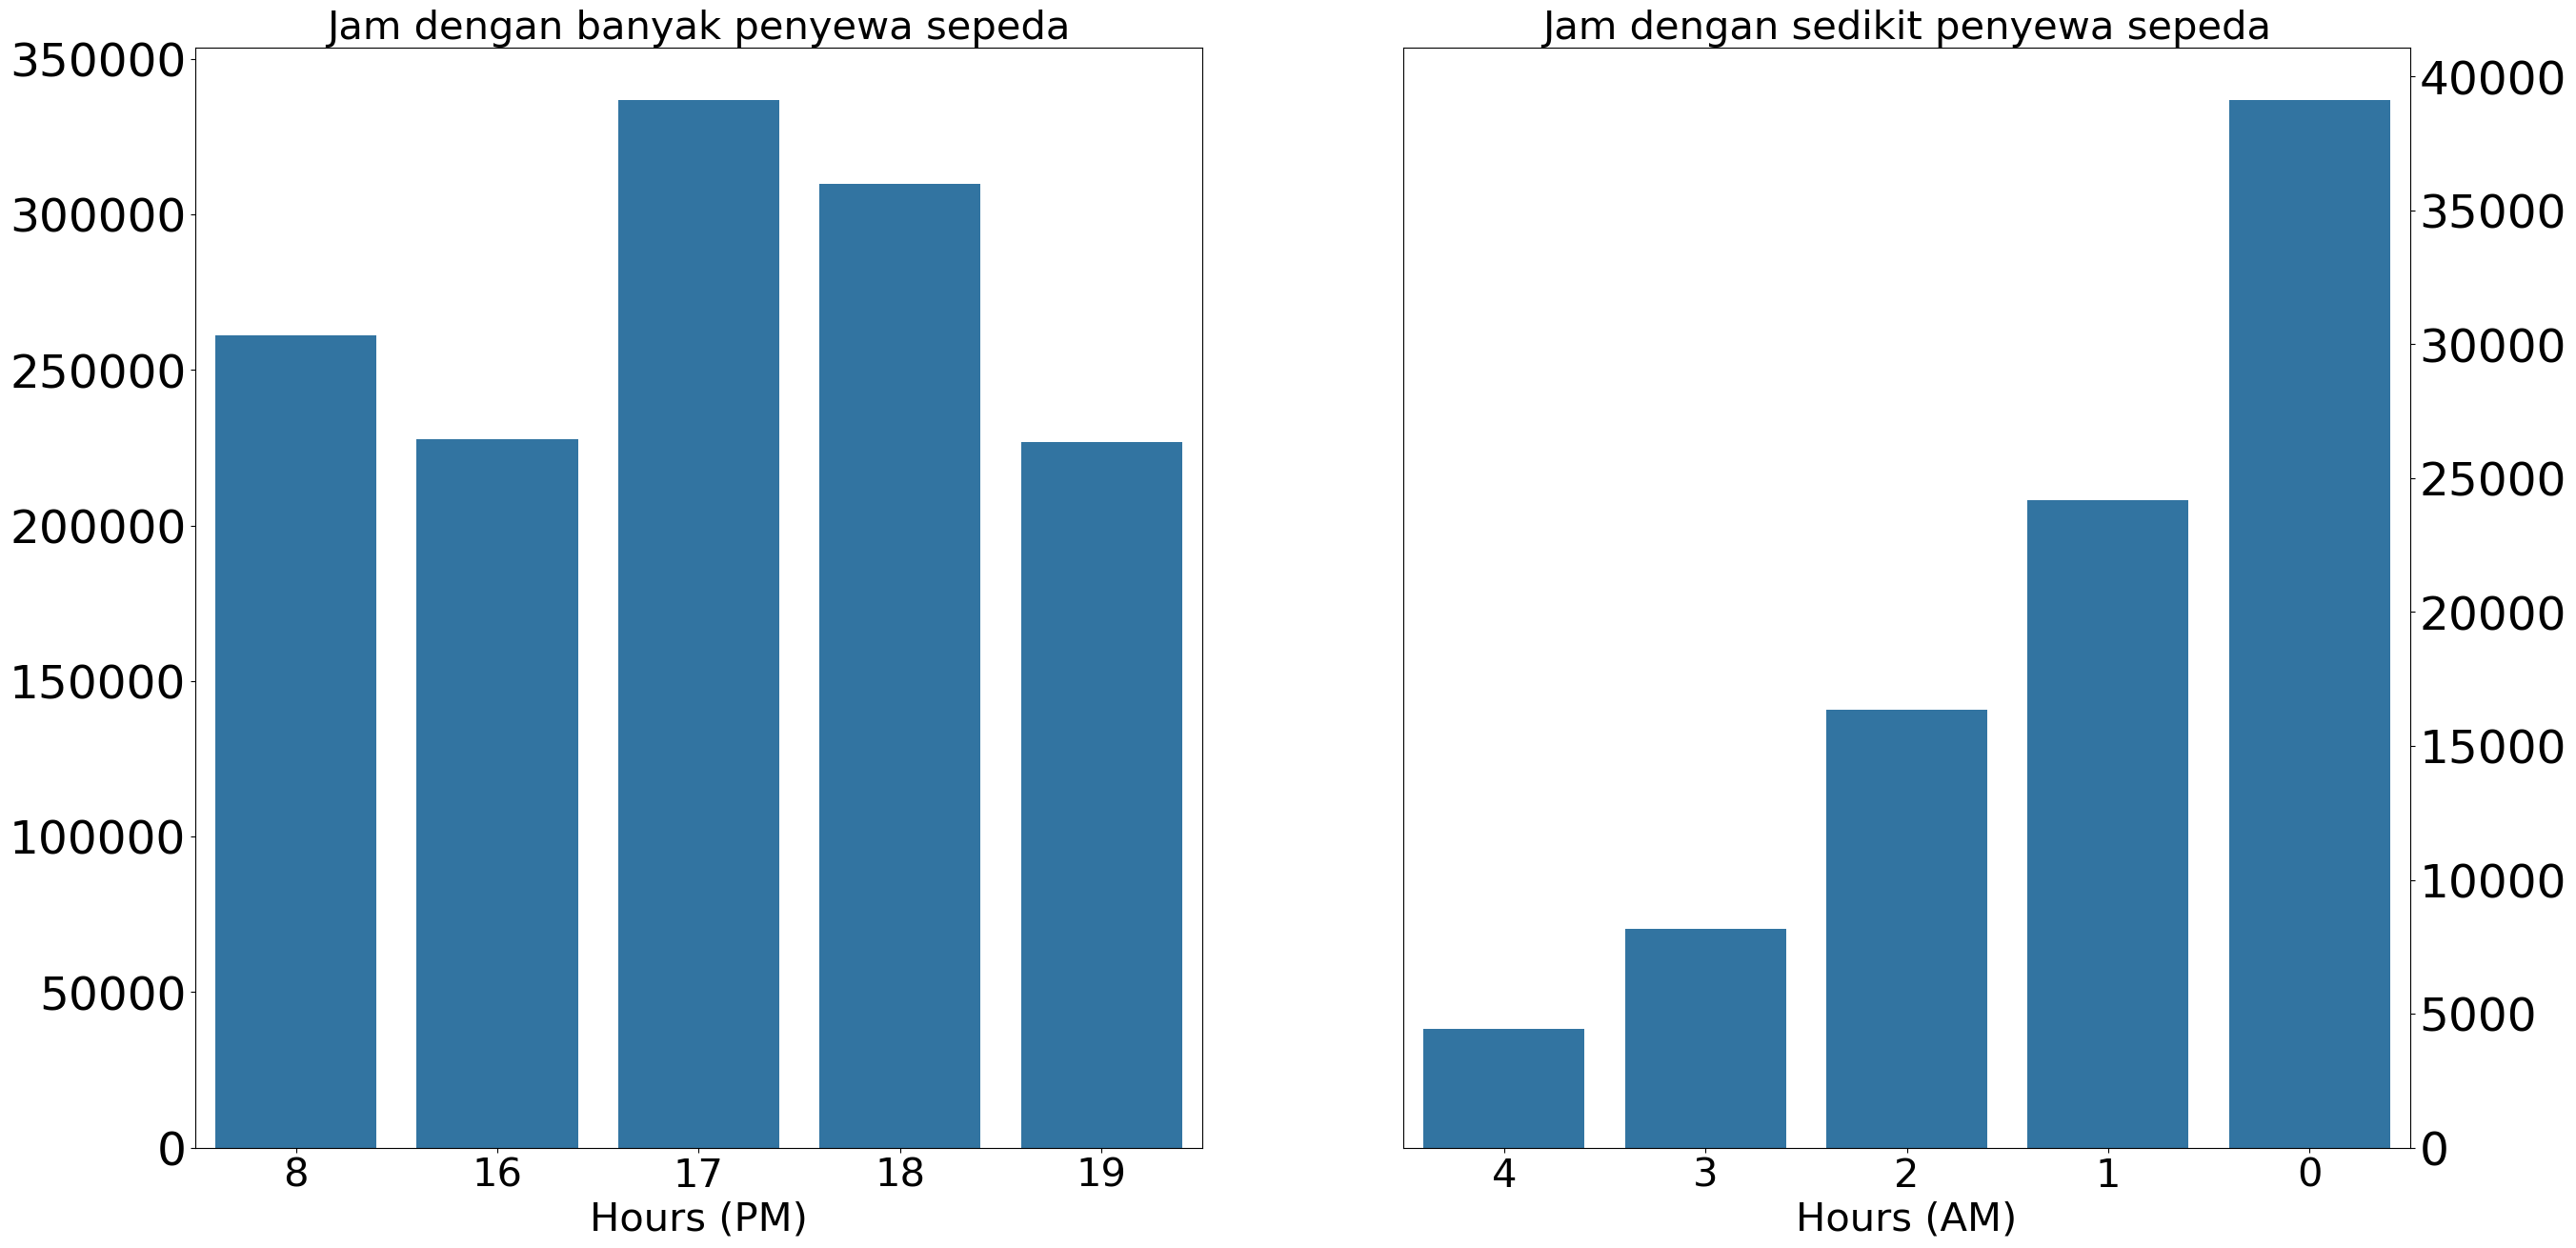

In [34]:
sum_order = df_hour.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))
sns.barplot(
    x="hours", 
    y="count_cr", 
    data=sum_order.head(5), 
    ax=ax[0]
)

ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(
    x="hours", 
    y="count_cr", 
    data=sum_order.sort_values(
        by="hours", 
        ascending=True
    ).head(5), 
    ax=ax[1]
)

ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

plt.show()


### Pertanyaan 2: Pada musim apa penyewaan sepeda mencapai puncaknya?

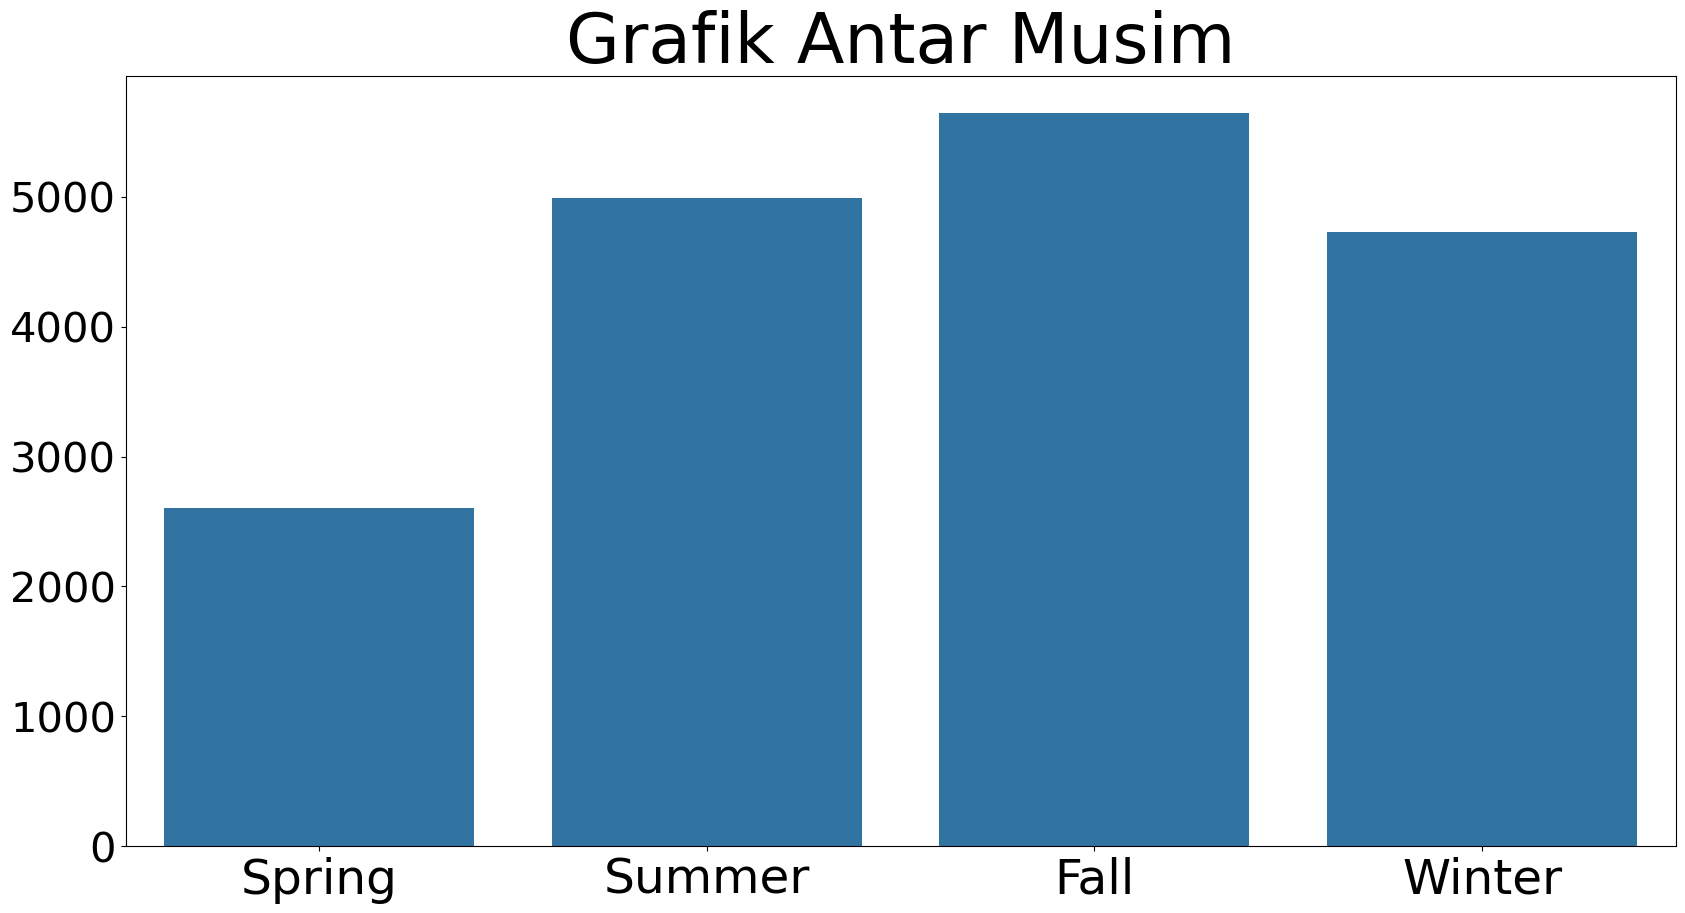

In [36]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(
    y="count_cr",
    x="season",
    data= df_day.sort_values(
        by="season",
        ascending=False
    ),
    ax=ax,
    errorbar=None
)

ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

plt.show()

### Pertanyaan 3: Bagaimana kinerja penjualan perusahaan dalam beberapa tahun terakhir?

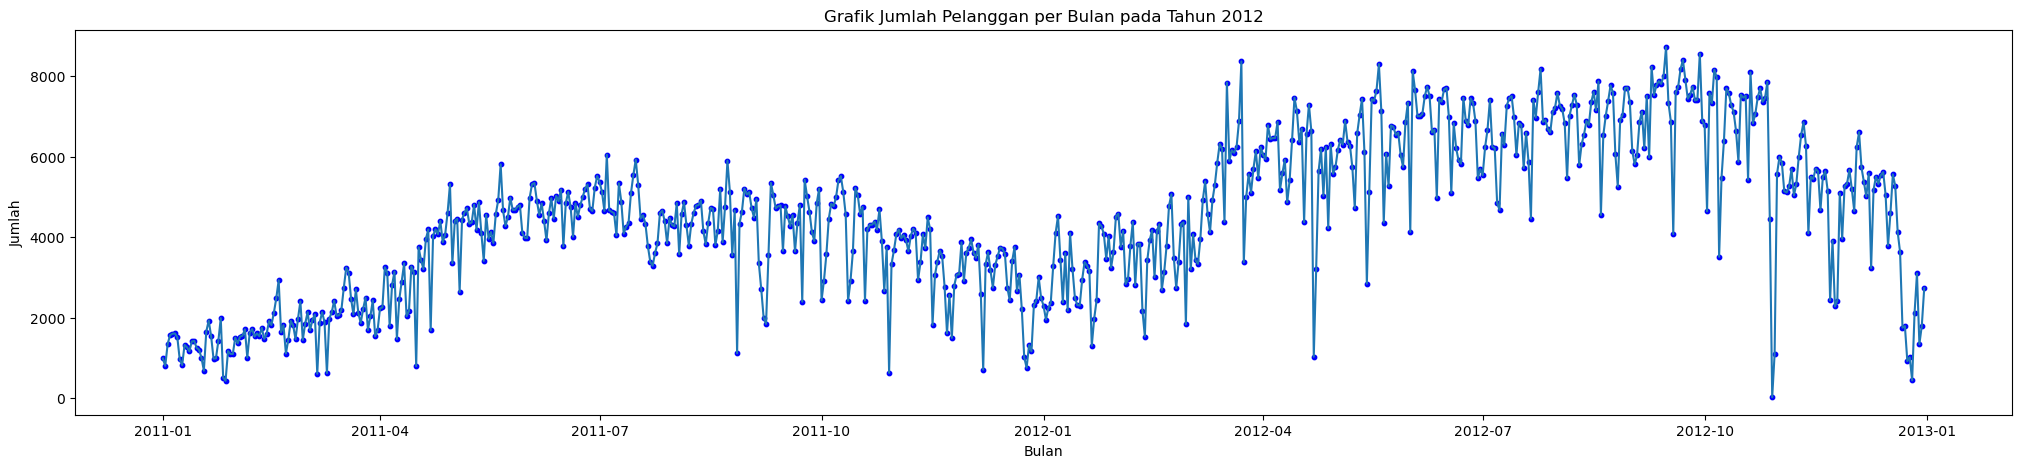

In [46]:
plt.figure(figsize=(25,5))

monthly_ct = df_day['count_cr'].groupby(df_day['dteday']).max()

plt.scatter(
    monthly_ct.index,
    monthly_ct.values,
    marker='o',
    color='blue',
    s=10
)
plt.plot(monthly_ct.index,monthly_ct.values)
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Grafik Jumlah Pelanggan per Bulan pada Tahun 2012')

plt.show()

### Pertanyaan 4: Bagaimana perbandingan antara pelanggan terdaftar dan pelanggan kasual?

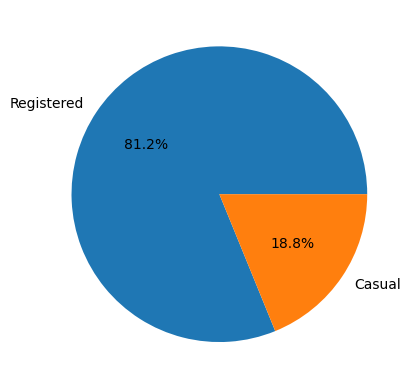

In [58]:
casual_total = sum(df_day['casual'])

total_regiter = sum(df_day['registered'])

data = [total_regiter, casual_total]

labels = ["Registered", "Casual"]

plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.show()

## Conclusion

- **Pertanyaan 1:** Jam berapa yang paling sering dan paling jarang disewa?
- **Pertanyaan 2:** Pada musim apa penyewaan sepeda mencapai puncaknya?
- **Pertanyaan 3:** Bagaimana kinerja penjualan perusahaan dalam beberapa tahun terakhir?
- **Pertanyaan 4:** Bagaimana perbandingan antara pelanggan terdaftar dan pelanggan kasual?

**Conclution pertanyaan 1:** Berdasarkan gambar di atas, Anda dapat melihat bahwa penyewaan sepda paling banyak digunakan pada jam 17:00. Kontras dengan hal tersebut, penyewaan pada jam 04:00 merupakan produk yang paling sedikit terjual.

**conclution pertanyaan 2:** pada musim Fall (musim gugur).

**conclution pertanyaan 3:** Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan September 2012. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan januari 2011.

**conclution pertanyaan 4:** Seseorang yang sudah registered sebanyak 81.2% sedangkan sesorang yang belum melakukan regsitered (casual) sebanyak 18.8%